In [61]:
import os
import librosa
import matplotlib.pyplot as plt
import numpy as np

folder1_path = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\set_a'
folder2_path =  r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\set_b'

def process_audio_file(file_path, output_folder):
    # Load audio file
    custom_sr=5
    audio, sr = librosa.load(file_path, sr= custom_sr)

    time = np.arange(0, len(audio)) / sr

    plt.figure(figsize=(14, 5))
    plt.plot(time, audio)
    plt.title('Heartbeat Sound Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    
    file_name = os.path.splitext(os.path.basename(file_path))[0]

    os.makedirs(output_folder, exist_ok=True)

    plot_path = os.path.join(output_folder, f'{file_name}_waveform.png')
    plt.savefig(plot_path)
    plt.close()

    print(f'Processed: {file_name}')

output_folder1_path = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\refined_a'
output_folder2_path = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\refined_b'

for file_name in os.listdir(folder1_path):
    file_path = os.path.join(folder1_path, file_name)
    if file_path.endswith('.wav'):
        process_audio_file(file_path, output_folder1_path)

for file_name in os.listdir(folder2_path):
    file_path = os.path.join(folder2_path, file_name)
    if file_path.endswith('.wav'):
        process_audio_file(file_path, output_folder2_path)



Processed: artifact__201012172012
Processed: artifact__201105040918
Processed: artifact__201105041959
Processed: artifact__201105051017
Processed: artifact__201105060108
Processed: artifact__201105061143
Processed: artifact__201105190800
Processed: artifact__201105280851
Processed: artifact__201106010559
Processed: artifact__201106010602
Processed: artifact__201106021541
Processed: artifact__201106030612
Processed: artifact__201106031558
Processed: artifact__201106040722
Processed: artifact__201106040933
Processed: artifact__201106040947
Processed: artifact__201106041452
Processed: artifact__201106050353
Processed: artifact__201106061233
Processed: artifact__201106070537
Processed: artifact__201106070949
Processed: artifact__201106101314
Processed: artifact__201106101955
Processed: artifact__201106110909
Processed: artifact__201106111119
Processed: artifact__201106121242
Processed: artifact__201106121445
Processed: artifact__201106131834
Processed: artifact__201106131835
Processed: art

In [22]:
from PIL import Image, ImageFilter, ImageOps
import os

def refine_and_save_waveform_image(image_path, output_folder):

    img = Image.open(image_path)

    img_gray = ImageOps.grayscale(img)


    img_denoised = img_gray.filter(ImageFilter.MedianFilter(size=3))


    img_contrast = ImageOps.equalize(img_denoised)

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)


    refined_path = os.path.join(output_folder, f'refined_{os.path.basename(image_path)}')
    img_contrast.save(refined_path)

    print(f'Refined image saved: {refined_path}')

# Example usage
image_path = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\wav_a\artifact__201106040722_waveform.png'
output_folder = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\refined_a'
refine_and_save_waveform_image(image_path, output_folder)


Refined image saved: C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\refined_a\refined_artifact__201106040722_waveform.png


In [1]:
import numpy as np
from PIL import Image
from skimage import exposure, color, filters
import os

def refine_and_save_waveform_image(image_path, output_folder):

    img = Image.open(image_path)


    img = img.convert('RGB')

 
    img_gray = color.rgb2gray(np.array(img, dtype=np.float64) / 255.0)


    img_denoised = filters.median(img_gray)


    img_equalized = exposure.equalize_hist(img_denoised)


    img_final = (img_equalized * 255).astype(np.uint8)

    os.makedirs(output_folder, exist_ok=True)


    refined_path = os.path.join(output_folder, f'refined_{os.path.basename(image_path)}')
    Image.fromarray(img_final).save(refined_path)

    print(f'Refined image saved: {refined_path}')


image_path = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\refined_a\artifact__201106040722_waveform.png'
output_folder = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds'
refine_and_save_waveform_image(image_path, output_folder)


OSError: [Errno 22] Invalid argument: 'C:C:\\Users\\ASUS\\Downloads\\heartbeat-sounds-20231222T161428Z-001\\heartbeat-sounds\\refined_a\\artifact__201106040722_waveform.png'

In [37]:
from PIL import Image
from skimage import color, filters
import numpy as np
import os

def preprocess_and_save_waveform(image_path, output_folder):
    img = Image.open(image_path)

    img_gray = img.convert('L')
y
    img_array = np.array(img_gray, dtype=np.float64) / 255.0

    img_denoised = filters.median(img_array)

  
    output_path = os.path.join(output_folder, f'preprocessed_{os.path.basename(image_path)}')
    Image.fromarray((img_denoised * 255).astype(np.uint8)).save(output_path)

image_path = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\wav_a\artifact__201106040722_waveform.png'
output_folder = r'C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\refined_a'
preprocess_and_save_waveform(image_path, output_folder)


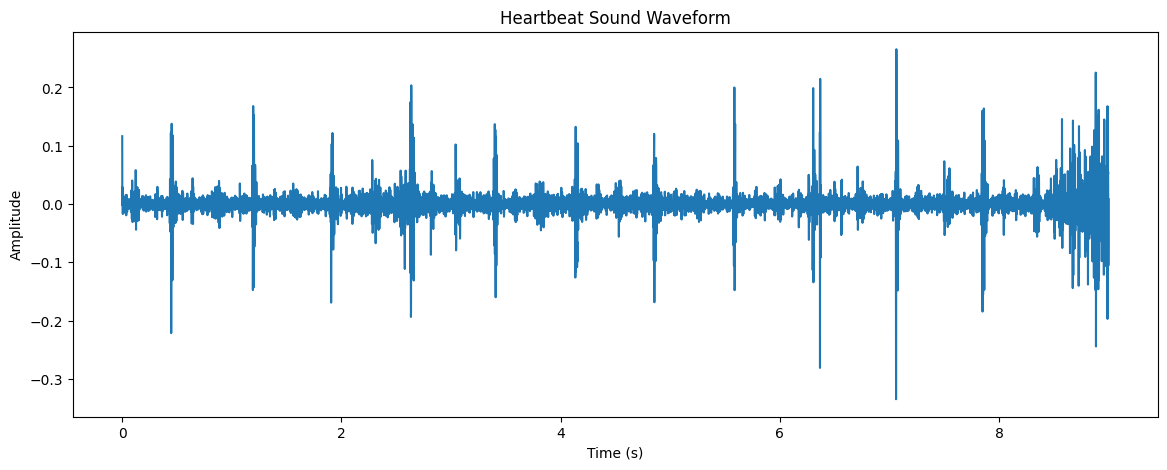

In [58]:
import librosa

audio_path = 'C:\\Users\\ASUS\\Downloads\\heartbeat-sounds-20231222T161428Z-001\\heartbeat-sounds\\set_a\\artifact__201106040722.wav'
custom_sr = 1000# Replace with your desired sample rate
audio, sr = librosa.load(audio_path, sr=custom_sr)

time = np.arange(0, len(audio)) / sr
plt.figure(figsize=(14, 5))
plt.plot(time, audio)
plt.title('Heartbeat Sound Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


In [69]:
import os
import numpy as np
from skimage import io  # Use scikit-image for image loading
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models, utils

# Load your preprocessed data
data_folders = ["C:\\Users\\ASUS\\Downloads\\heartbeat-sounds-20231222T161428Z-001\\heartbeat-sounds\\wav_a", "C:\\Users\\ASUS\\Downloads\\heartbeat-sounds-20231222T161428Z-001\\heartbeat-sounds\\wav_b"]
X = []
y = []

for label, folder in enumerate(data_folders):
    for file_name in os.listdir(folder):
        file_path = os.path.join(folder, file_name)
        if file_path.endswith('.png'):
            waveform_data = io.imread(file_path)  # Use scikit-image to load image
            X.append(waveform_data)
            y.append(label)

# Convert lists to numpy arrays
X = np.array(X)
y = np.array(y)

# ... (rest of your code remains unchanged)


# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# ... (rest of your code remains unchanged)


# Define the 1D CNN model
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape data for 1D CNN input
X_train = X_train.reshape((len(X_train), -1, 1))
X_test = X_test.reshape((len(X_test), -1, 1))


# Define the 1D CNN model
model = models.Sequential()
model.add(layers.Conv1D(32, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(layers.MaxPooling1D(2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
accuracy = model.evaluate(X_test, y_test)[1]
print(f"Test accuracy: {accuracy}")



ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:CPU:0}} OOM when allocating tensor with shape[44799968,64] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator mklcpu [Op:Mul] name: 

In [95]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelEncoder

def load_images(folder, target_width, target_height):
    images = []
    labels = []

    print(f"Processing folder: {folder}")

    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)

        # Check if the current item is a directory
        if not os.path.isdir(label_folder):
            continue

        print(f"Loading images from label: {label}")

        for file_name in os.listdir(label_folder):
            file_path = os.path.join(label_folder, file_name)

            # Check if the current item is a file
            if not os.path.isfile(file_path):
                continue

            print(f"Loading image: {file_path}")

            try:
                # Read the image
                image = cv2.imread(file_path, cv2.IMREAD_COLOR)

                # Check if the image is loaded successfully
                if image is None:
                    print(f"Error loading image: {file_path}. The image is None.")
                    continue

                # Check if the image has a valid size
                if image.size == 0:
                    print(f"Empty image: {file_path}")
                    continue

                # Resize the image
                image = cv2.resize(image, (target_width, target_height))
                images.append(image)
                labels.append(label)

            except Exception as e:
                print(f"Error loading image: {file_path}. Exception: {e}")

    return images, labels

# Rest of the code remains the same




# Load your preprocessed data
data_folders = [
    "C:\\Users\\ASUS\\Downloads\\heartbeat-sounds-20231222T161428Z-001\\heartbeat-sounds\\wav_a",
    "C:\\Users\\ASUS\\Downloads\\heartbeat-sounds-20231222T161428Z-001\\heartbeat-sounds\\wav_b"
]
X = []
y = []

print("Data Folders:")
print(data_folders)

for folder in data_folders:
    images, labels = load_images(folder, target_width=128, target_height=128)
    X.extend(images)
    y.extend(labels)

    # Print loaded file paths
    print(f"Loaded {len(images)} images from {folder}")

# Print contents after loading
print(f"Number of samples: {len(X)}")
print(f"Number of labels: {len(y)}")
print(f"Unique labels: {np.unique(y)}")

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Print label encoding information
print(f"Number of classes: {num_classes}")
print(f"Encoded labels: {y_encoded}")

# Continue with the rest of your code
# ...



# Convert lists to numpy arrays
X = np.array(X)
y_encoded = np.array(y_encoded)

# Check the size of your data
print(f"Number of samples: {len(X)}")
print(f"Number of labels: {len(y_encoded)}")

# Add this print statement to check the unique labels in your dataset
print(f"Unique labels: {np.unique(y_encoded)}")

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Check the size of your train and test sets
print(f"Train set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Data Folders:
['C:\\Users\\ASUS\\Downloads\\heartbeat-sounds-20231222T161428Z-001\\heartbeat-sounds\\wav_a', 'C:\\Users\\ASUS\\Downloads\\heartbeat-sounds-20231222T161428Z-001\\heartbeat-sounds\\wav_b']
Processing folder: C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\wav_a
Loaded 0 images from C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\wav_a
Processing folder: C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\wav_b
Loaded 0 images from C:\Users\ASUS\Downloads\heartbeat-sounds-20231222T161428Z-001\heartbeat-sounds\wav_b
Number of samples: 0
Number of labels: 0
Unique labels: []
Number of classes: 0
Encoded labels: []
Number of samples: 0
Number of labels: 0
Unique labels: []


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.